In [1]:
# Import essential libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('../StudentsPerformance.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check dataset information (data types, nulls, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

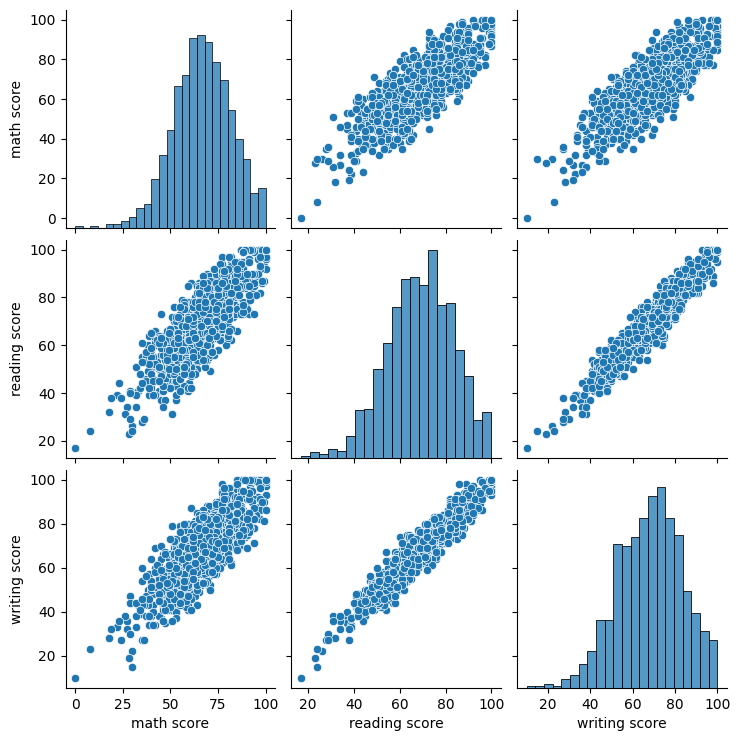

In [9]:
# Pairplot to observe relationships among features
sns.pairplot(df)

<Axes: >

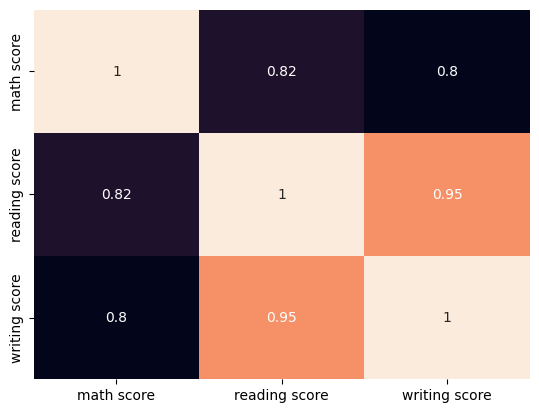

In [10]:
# Correlation heatmap for numerical features
sns.heatmap(df.drop(['gender','lunch','parental level of education','race/ethnicity','test preparation course'],axis=1).corr(),annot=True,cbar=False)

<Axes: xlabel='test preparation course', ylabel='math score'>

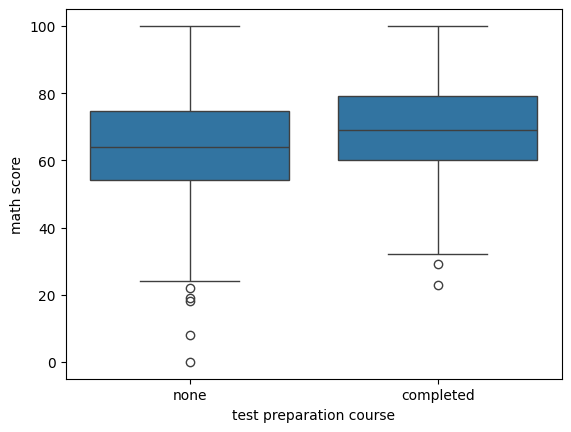

In [11]:
sns.boxplot(data=df,x='test preparation course',y='math score')

<Axes: xlabel='gender', ylabel='math score'>

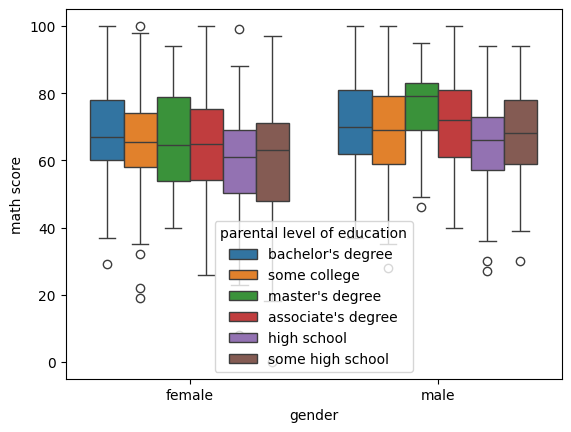

In [12]:
sns.boxplot(data=df,x='gender',y='math score',hue='parental level of education')

<Axes: xlabel='race/ethnicity', ylabel='math score'>

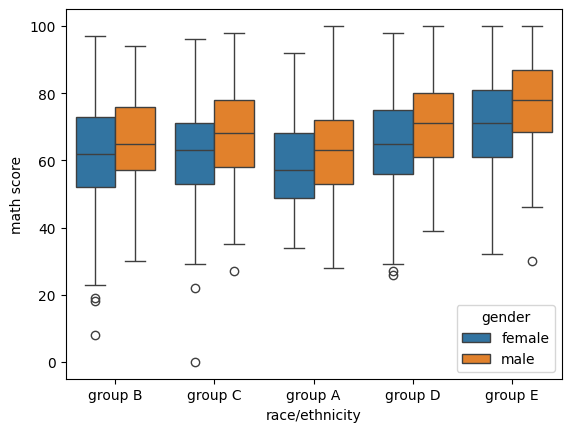

In [13]:
sns.boxplot(data=df,x='race/ethnicity',y='math score',hue='gender')

<Axes: xlabel='lunch', ylabel='math score'>

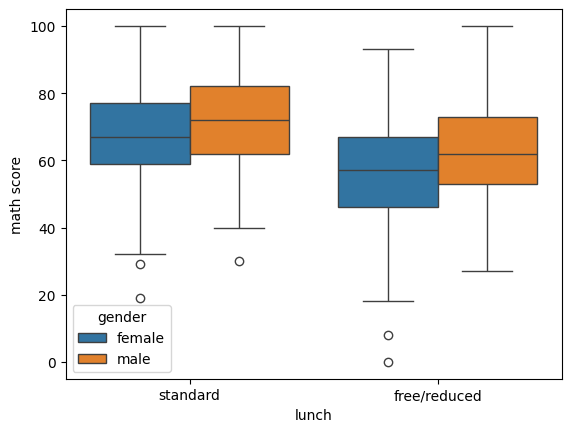

In [14]:
sns.boxplot(data=df,x='lunch',y='math score',hue='gender')

In [15]:
# Convert categorical columns to numerical using one-hot encoding
gender = pd.get_dummies(df['gender'],dtype=int,drop_first=True).rename(columns={'male':'gender'})
race = pd.get_dummies(df['race/ethnicity'],dtype=int,drop_first=True)
parent_education = pd.get_dummies(df['parental level of education'],dtype=int,drop_first=True)
lunch = pd.get_dummies(df['lunch'],dtype=int,drop_first=True).rename(columns={'standard':'lunch'})
test_prep = pd.get_dummies(df['test preparation course'],dtype=int,drop_first=True).rename(columns={'none':'test_prep'})

In [16]:
# Drop original categorical columns and concatenate the new numeric columns
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)
df = pd.concat([df,gender,race,parent_education,lunch,test_prep],axis=1)

In [17]:
# Create an interaction feature between Group E and Master's Degree
df['master_group'] = df['group E']*df["master's degree"]

In [18]:
# Save cleaned data for reuse
df.to_csv('../cleaned_student_scores.csv')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
# Define features and target
x = df.drop('math score',axis=1)
y = df['math score']

In [21]:
# Split into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [22]:
# Initialize and train the linear regression model
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
# observe the coef_ respect to each feature
pd.DataFrame(index=['reading score', 'writing score', 'gender', 'group B','group C', 'group D', 'group E', "bachelor's degree", 'high school',
"master's degree", 'some college', 'some high school', 'lunch','test_prep','master_group'],columns=['Coef_'],data=lm.coef_)

,Coef_
reading score,0.286626
writing score,0.689184
gender,13.872976
group B,1.931609
group C,0.798490
group D,0.830324
group E,5.528720
bachelor's degree,-1.197662
high school,0.409227
master's degree,-1.141413


In [24]:
lm.intercept_

-13.557759590885624

In [25]:
# Predict and evaluate
prediction = lm.predict(x_test)

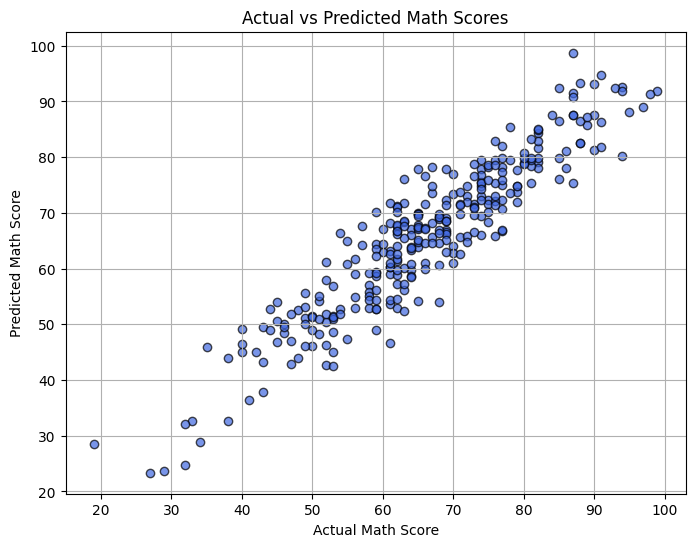

In [26]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.7, color="royalblue", edgecolor='k')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.savefig("../assets/actual_vs_predicted.png", dpi=300)

In [27]:
#let's check out MSE and RMSE scores
mse = metrics.mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 28.3851658607945
RMSE: 5.32777306768921


In [28]:
r2 = metrics.r2_score(y_test,prediction)
print(f'R2: {r2}')

R2: 0.8560508859259872


<Axes: xlabel='math score', ylabel='Count'>

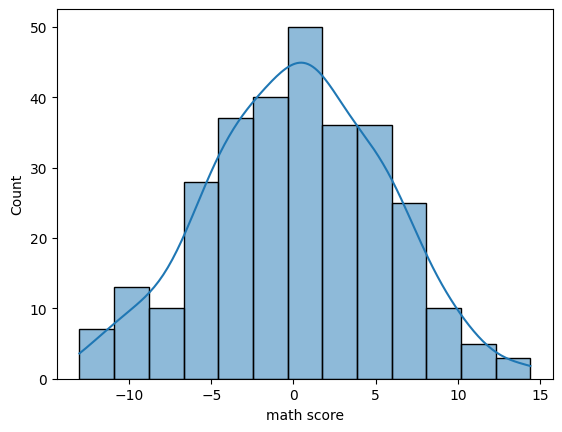

In [29]:
#let's plot our residuals
sns.histplot((y_test-prediction),kde=True)